In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [3]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pref = pd.merge(pref, pop, on="都道府県名", how="left")


In [5]:
pref["10万人あたり感染者数"] = pref["各地の感染者数_1日ごとの発表数"]/(pref["人口"]/100000)
pref["10万人あたり感染者数移動平均7"] = pref["10万人あたり感染者数"].rolling(7).mean()

### 感染者数前日比

In [6]:
import numpy as np
pref["感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"感染者数前日比"] = np.nan
pref["感染者数前日比移動平均7"] = pref["感染者数前日比"].rolling(7).mean()

In [7]:
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7,感染者数前日比,感染者数前日比移動平均7
23307,2021-05-21,47,沖縄県,207,14694,1,148,153.285714,1481547,13.971882,10.346328,0.045455,0.216365
23308,2021-05-22,47,沖縄県,231,14925,0,148,163.428571,1481547,15.591810,11.030941,0.115942,0.205210
23309,2021-05-23,47,沖縄県,156,15081,0,148,174.571429,1481547,10.529534,11.783050,-0.324675,0.232042
23310,2021-05-24,47,沖縄県,104,15185,0,148,181.000000,1481547,7.019690,12.216960,-0.333333,0.219221
23311,2021-05-25,47,沖縄県,256,15441,0,148,193.571429,1481547,17.279236,13.065494,1.461538,0.164090


In [8]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23312 entries, 0 to 23311
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                23312 non-null  datetime64[ns]
 1   都道府県コード           23312 non-null  int64         
 2   都道府県名             23312 non-null  object        
 3   各地の感染者数_1日ごとの発表数  23312 non-null  int64         
 4   各地の感染者数_累計        23312 non-null  int64         
 5   各地の死者数_1日ごとの発表数   23312 non-null  int64         
 6   各地の死者数_累計         23312 non-null  int64         
 7   感染者数移動平均7         23306 non-null  float64       
 8   人口                23312 non-null  int64         
 9   10万人あたり感染者数       23312 non-null  float64       
 10  10万人あたり感染者数移動平均7  23306 non-null  float64       
 11  感染者数前日比           15803 non-null  float64       
 12  感染者数前日比移動平均7      10462 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 2.5+ MB


In [9]:
prefs = {
    "東京都": ("-",1.1),
    "大阪府": ("-",1.1),
    "京都府": ("-",1.1),
    "兵庫県": ("-",1.1),
    "愛知県": ("-",1.1),
    "福岡県": ("-",1.1),
    "北海道": ("-",1.1),
    "岡山県": ("-",1.1),
    "広島県": ("-",1.1),
    "沖縄県": ("-",1.0),
    "埼玉県": ("--",1.0),
    "千葉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "岐阜県": ("--",1.0),
    "三重県": ("--",1.0),
    "石川県": ("--",1.0),
    "群馬県": ("--",1.0),
    "熊本県": ("--",1.0),
#    "愛媛県": (":",1.0),
    "大分県": (":",1.5),
    "佐賀県": (":",1.5),
    "奈良県": (":",1.5),
    "山口県": (":",1.5),
    "滋賀県": (":",1.5),
    "高知県": (":",1.5),
#    "福井県": (":",1.5),
    "富山県": (":",1.5),
}

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


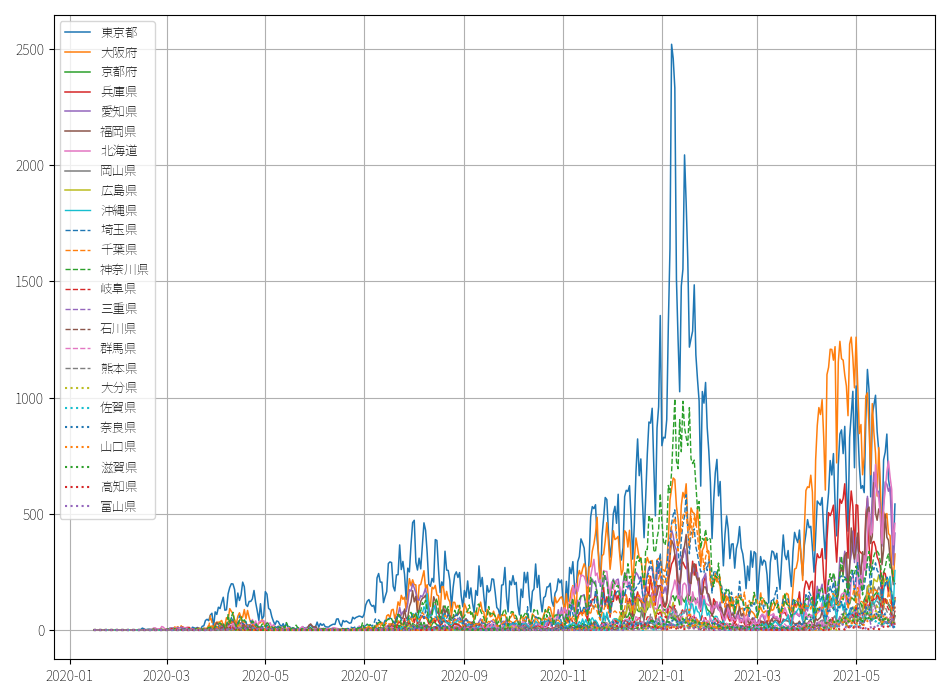

In [11]:
plt.figure(figsize=(9.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.tight_layout()

<IPython.core.display.Javascript object>


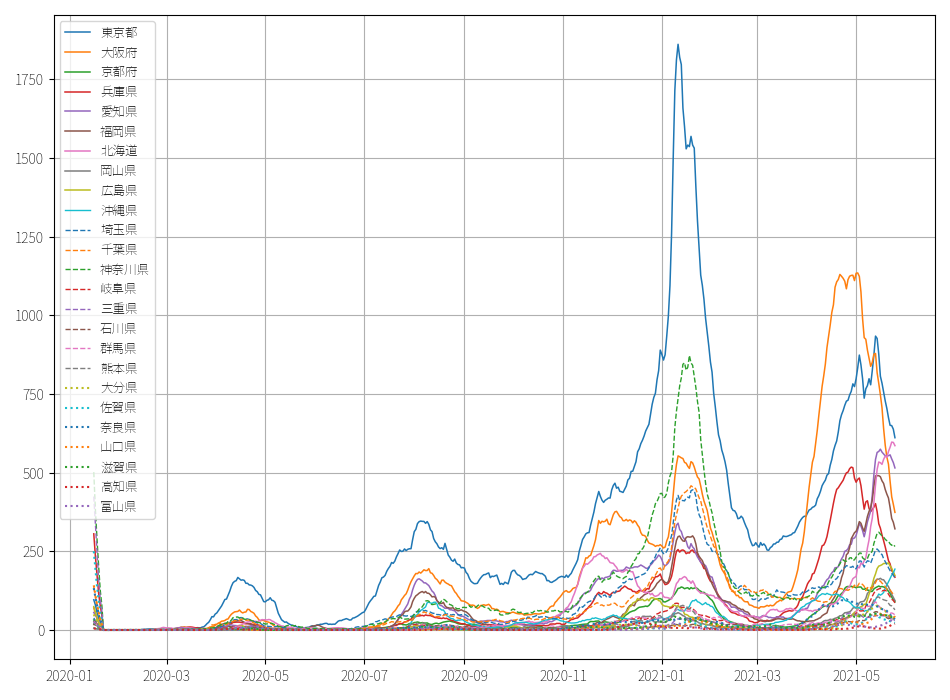

In [12]:
plt.figure(figsize=(9.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.tight_layout()

<IPython.core.display.Javascript object>


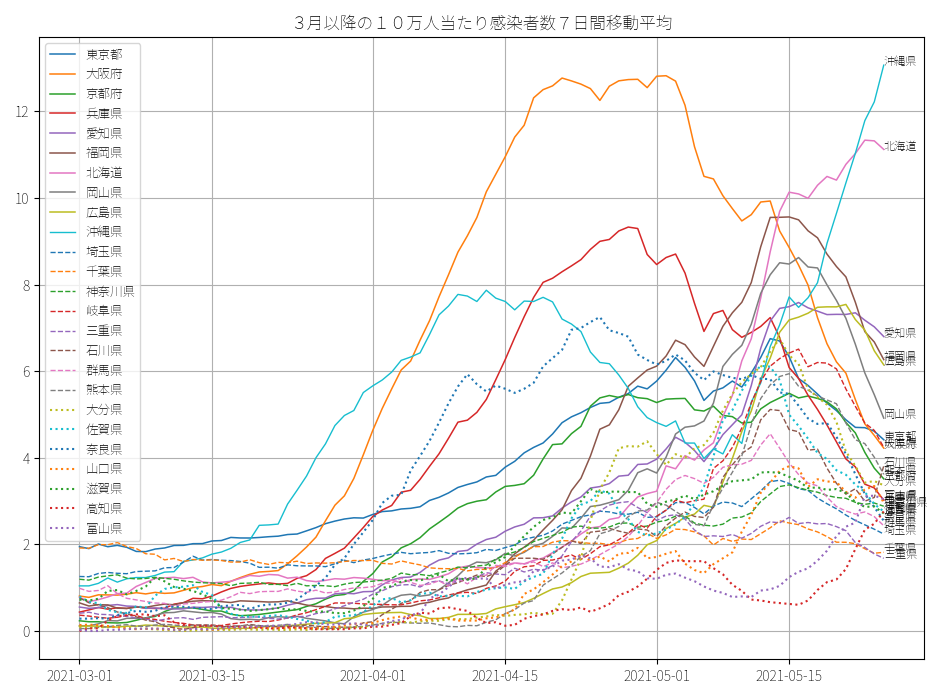

In [33]:
plt.figure(figsize=(9.5,7))
plt.title("３月以降の１０万人当たり感染者数７日間移動平均")
pref_latest = pref.loc[pref["日付"]>="20210301"]
dates = pref_latest["日付"].unique()
for p in prefs:
    values = pref_latest.loc[pref_latest["都道府県名"]==p]["10万人あたり感染者数移動平均7"]
    plt.plot_date(dates,values,label=p, fmt=prefs[p][0], lw=prefs[p][1])
    latest_value = pref_latest.loc[(pref_latest["都道府県名"]==p) & (pref_latest["日付"]==dates.max())]["10万人あたり感染者数移動平均7"]
    plt.text(dates.max(),latest_value,p,fontsize=8)
plt.grid()
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.tight_layout()